## Solución de Etapa 1 de exploración de los datos
### Tarea Módulo de Python para Desarrolladores.
- Profesores: Luis Llana Díaz & Yolanda García Ruiz
----------------------------------------------------
- Alumno: Jimmy Calvo Monge
- Universidad Complutense de Madrid
- Master en Data Engineering

In [1]:
import requests
from requests.exceptions import ConnectionError
import zipfile, io
import re
import csv
import pandas as pd
import typing
import matplotlib.pyplot as plt

### La descarga de los ficheros

In [2]:
def csv_from_zip(url: str) -> io.StringIO:
    try:
        r = requests.get(url)
        if r.status_code == 200:
            bytes = io.BytesIO(r.content)
            zfile = zipfile.ZipFile(bytes)
            files = zfile.filelist
            for file in files:
                if len(re.findall('^trips_(.*?).csv', file.filename)) > 0:
                    with zfile.open(file.filename) as f:
                        contents = f.read()
                    contentstr = contents.decode('utf-8')
                    fstr = io.StringIO(contentstr)
                    return fstr
    except ConnectionError as errc:
        print("Error Connecting:", errc)

def get_data(csvfile: io.StringIO) -> pd.DataFrame:
    data = pd.read_csv(csvfile, sep=";", index_col=['fecha'], parse_dates=True)
    cols_to_keep = ['idBike', 'fleet', 'trip_minutes', 'geolocation_unlock',
                    'address_unlock', 'unlock_date', 'locktype', 'unlocktype',
                    'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock',
                    'unlock_station_name', 'station_lock', 'lock_station_name']
    data = data[cols_to_keep]
    return data

In [3]:
link = '/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx'
base = 'https://opendata.emtmadrid.es/'
url = f'{base}{link}'
csvfile = csv_from_zip(url)
usos = get_data(csvfile)
usos.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,7337.0,1.0,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',2023-02-01T00:00:10,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01T00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,5098.0,1.0,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:25,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
assert usos.index.inferred_type == 'datetime64'

### Explorar la estructura de los datos en el dataframe

In [5]:
usos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336988 entries, NaT to 2023-02-18
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   idBike               168494 non-null  float64
 1   fleet                168494 non-null  float64
 2   trip_minutes         168494 non-null  float64
 3   geolocation_unlock   168494 non-null  object 
 4   address_unlock       168494 non-null  object 
 5   unlock_date          168494 non-null  object 
 6   locktype             168494 non-null  object 
 7   unlocktype           168494 non-null  object 
 8   geolocation_lock     168494 non-null  object 
 9   address_lock         168494 non-null  object 
 10  lock_date            168494 non-null  object 
 11  station_unlock       168114 non-null  float64
 12  unlock_station_name  168114 non-null  object 
 13  station_lock         168018 non-null  float64
 14  lock_station_name    168018 non-null  object 
dtypes: float

**Comentarios:**
Hemos cargado exitosamente el `DataFrame` usos a partir de la url solicitada. Vemos que el índice (`fecha`) es de tipo `datetime`. Tenemos 336988 filas y 15 columnas. La mayoría de columnas son de tipo `object`, excepto por `idBike, fleet, trip_minutes, station_unlock, station_lock` que son de tipo `float64`.

### Borrado de valores NaN

In [6]:
def delete_nan_rows(data: pd.DataFrame) -> None:
    data.dropna(how='all', inplace=True)

In [7]:
delete_nan_rows(usos)
usos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168494 entries, 2023-02-01 to 2023-02-18
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   idBike               168494 non-null  float64
 1   fleet                168494 non-null  float64
 2   trip_minutes         168494 non-null  float64
 3   geolocation_unlock   168494 non-null  object 
 4   address_unlock       168494 non-null  object 
 5   unlock_date          168494 non-null  object 
 6   locktype             168494 non-null  object 
 7   unlocktype           168494 non-null  object 
 8   geolocation_lock     168494 non-null  object 
 9   address_lock         168494 non-null  object 
 10  lock_date            168494 non-null  object 
 11  station_unlock       168114 non-null  float64
 12  unlock_station_name  168114 non-null  object 
 13  station_lock         168018 non-null  float64
 14  lock_station_name    168018 non-null  object 
dtypes

**Comentarios:** Luego de aplicar nuestra función `delete_nan_rows` vemos que ahora tenemos un total de 168494 filas. Hemos borrado las filas que tenían todos sus valores como NaN's.

In [8]:
usos.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,,
2023-02-01,7337.0,1.0,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',2023-02-01T00:00:10,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01T00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
2023-02-01,5098.0,1.0,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:25,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
2023-02-01,6519.0,1.0,0.27,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:00:36,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:00:52,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura
2023-02-01,2551.0,1.0,8.58,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:53,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6991147, ...",'Calle Atocha nº 54',2023-02-01T00:09:28,52.0,48 - Embajadores 2,45.0,41 - Antón Martín
2023-02-01,6519.0,1.0,0.20,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:00:57,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:01:09,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura


### Exploración de las columnas.

¿Cuántos valores distintos hay en la columna fleet del dataframe usos? \
R/ Esto lo obtenemos con el siguiente código:

In [9]:
usos['fleet'].unique() # Hay dos valores distintos en esta columna.

array([1., 2.])

¿Cuántos valores distintos hay en las columnas locktype y unlocktype del dataframe usos? \
R/ Lo vemos a continuación:

In [10]:
print(usos['locktype'].unique()) # Hay dos valores distintos en esta columna.
print(usos['unlocktype'].unique()) # Hay dos valores distintos en esta columna.

['STATION' 'FREE']
['STATION' 'FREE']


### Cambio de tipo de datos

In [11]:
def float_to_str(data: pd.DataFrame, column: str) -> None:
    if column in data.columns:
        data[column] = data[column].map(lambda x: str(x).split('.')[0])

In [12]:
float_to_str(usos, 'idBike')

In [13]:
float_to_str(usos, 'fleet')

In [14]:
usos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168494 entries, 2023-02-01 to 2023-02-18
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   idBike               168494 non-null  object 
 1   fleet                168494 non-null  object 
 2   trip_minutes         168494 non-null  float64
 3   geolocation_unlock   168494 non-null  object 
 4   address_unlock       168494 non-null  object 
 5   unlock_date          168494 non-null  object 
 6   locktype             168494 non-null  object 
 7   unlocktype           168494 non-null  object 
 8   geolocation_lock     168494 non-null  object 
 9   address_lock         168494 non-null  object 
 10  lock_date            168494 non-null  object 
 11  station_unlock       168114 non-null  float64
 12  unlock_station_name  168114 non-null  object 
 13  station_lock         168018 non-null  float64
 14  lock_station_name    168018 non-null  object 
dtypes

### Consultas

#### C1
¿Cuántas bicicletas han sido desbloqueadas de una estación y no se bloquean en ninguna? \
R/ Una bicicleta de este tipo no debe tener ningún `locktype` del tipo `STATION`, pero debe tener por lo menos un `unlocktype` del tipo `STATION`, de esta forma fue desbloqueada en alguna estación, pero no fue bloqueada en ninguna estación. Estas bicicletas las obtenemos con el siguiente código.

In [15]:
never_locked_bikes = pd.DataFrame(usos.groupby('idBike')[['unlocktype', 'locktype']
].apply(lambda x: 
        x['locktype'][x['locktype'].str.contains('STATION')].count() == 0 and 
        x['unlocktype'][x['unlocktype'].str.contains('STATION')].count() > 0)).reset_index()
never_locked_bikes.columns = ['idBike', 'NeverLocked']
never_locked_bikes = never_locked_bikes[never_locked_bikes['NeverLocked']]
never_locked_bikes

,idBike,NeverLocked
996,5190,True
1106,5389,True
1209,5592,True
1310,5769,True
1333,5822,True
1349,5863,True
1389,5948,True
2059,6875,True
2124,7006,True
2137,7028,True


Verificamos que algunas de estas bicicletas cumplen la condición deseada.

In [16]:
usos[usos['idBike'] == '7081']

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,,
2023-02-06,7081,2,17.10,"{'type': 'Point', 'coordinates': [-3.68514, 40...",'Calle General López Pozas nº 2',2023-02-06T19:35:36,FREE,STATION,"{'type': 'Point', 'coordinates': [-3.6832466, ...","'28006,ES,Madrid,Madrid,Calle de Velázquez 93,...",2023-02-06T19:52:42,263.0,255 - López Pozas,NaN,NaN
2023-02-09,7081,2,0.15,"{'type': 'Point', 'coordinates': [-3.6853166, ...","'28036,ES,Madrid,Madrid,Calle del General lópe...",2023-02-09T10:57:50,FREE,FREE,"{'type': 'Point', 'coordinates': [0, 0]}","'28909,ES,Madrid,Madrid,Camino de los Salmedin...",2023-02-09T10:57:59,NaN,NaN,NaN,NaN
2023-02-09,7081,2,2.00,"{'type': 'Point', 'coordinates': [-3.6823533, ...","'28046,ES,Madrid,Madrid,Calle de Mauricio lege...",2023-02-09T12:16:11,FREE,FREE,"{'type': 'Point', 'coordinates': [-3.6823499, ...","'28046,ES,Madrid,Madrid,Calle de Mauricio lege...",2023-02-09T12:18:11,NaN,NaN,NaN,NaN


In [17]:
usos[usos['idBike'] == '5822']

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,,
2023-02-03,5822,2,1.45,"{'type': 'Point', 'coordinates': [-3.648958444...",'Calle Carlota O'Neill nº 32',2023-02-03T20:06:56,FREE,STATION,"{'type': 'Point', 'coordinates': [-3.651535, 4...","'28027,ES,Madrid,Madrid,Calle de Aristóteles 7...",2023-02-03T20:08:23,238.0,230 - Carlota O’Neill,NaN,NaN
2023-02-06,5822,2,24.97,"{'type': 'Point', 'coordinates': [-3.6530083, ...","'28027,ES,Madrid,Madrid,Avenida de Badajoz 13,...",2023-02-06T12:03:46,FREE,FREE,"{'type': 'Point', 'coordinates': [-3.6573, 40....","'28050,ES,Madrid,Madrid,Plaza del Alcalde more...",2023-02-06T12:28:44,NaN,NaN,NaN,NaN
2023-02-07,5822,2,22.13,"{'type': 'Point', 'coordinates': [-3.7059466, ...","'28013,ES,Madrid,Madrid,Calle del Maestro vict...",2023-02-07T07:56:14,FREE,FREE,"{'type': 'Point', 'coordinates': [-3.6740366, ...","'28006,ES,Madrid,Madrid,Calle de Alcántara 4,M...",2023-02-07T08:18:22,NaN,NaN,NaN,NaN


#### C2
Seleccionar solo las bicicletas del tipo de flota '1' . El nuevo dataframe se ha de llamar regular_fleet.

In [18]:
regular_fleet = usos[usos['fleet'] == '1']
regular_fleet.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,,
2023-02-01,7337,1,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',2023-02-01T00:00:10,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01T00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
2023-02-01,5098,1,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:25,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
2023-02-01,6519,1,0.27,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:00:36,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:00:52,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura
2023-02-01,2551,1,8.58,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:53,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6991147, ...",'Calle Atocha nº 54',2023-02-01T00:09:28,52.0,48 - Embajadores 2,45.0,41 - Antón Martín
2023-02-01,6519,1,0.20,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:00:57,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01T00:01:09,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura


#### C3
Crea una función llamada `day_time` para calcular las horas totales de uso de 
bicicletas por día del mes. La función recibe un dataframe y 
devuelve una Serie donde el índice es la fecha y el valor es el número de horas.

Prueba la función anterior con el dataframe usos.

Opcional: Dibuja un diagrama de barras con el resultado de la 
función day_time sobre el dataframe usos. Utiliza el módulo `matplotlib.pyplot`.

In [19]:
def day_time(data: pd.DataFrame) -> pd.Series:
    data_use = data.copy()
    data_use = data_use[data_use['trip_minutes']>= 0]
    return data_use.groupby('fecha')['trip_minutes'].apply(lambda grp: grp.sum() / 60)
usos_day_time = day_time(usos)
usos_day_time

fecha
2023-02-01    4160.538500
2023-02-02    3435.122333
2023-02-03    3456.311667
2023-02-04    3640.818667
2023-02-05    3263.938167
2023-02-06    3372.989167
2023-02-07    2874.889500
2023-02-08    3446.484000
2023-02-09    3514.816500
2023-02-10    3596.700667
2023-02-11    2977.282500
2023-02-12    3003.624000
2023-02-13    3121.499333
2023-02-14    2751.551167
2023-02-15    2742.637167
2023-02-16    2464.674000
2023-02-17    1905.261667
2023-02-18     162.928500
Name: trip_minutes, dtype: float64

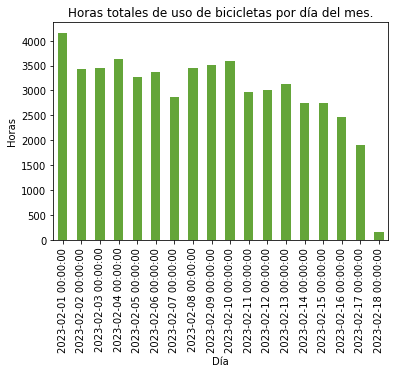

In [20]:
usos_day_time.plot.bar(color='#64A539')
plt.title("Horas totales de uso de bicicletas por día del mes.")
plt.xlabel("Día")
plt.ylabel("Horas")
plt.show()

#### C4
Crea una función llamada `weekday_time` para calcular las horas totales de 
uso de bicicletas por día de la semana. La función recibe un dataframe y 
devuelve una Serie donde el índice es el día de la semana `(L, M, X, J, V, S, D)`
y el valor es el número de horas.

Prueba la función anterior con el dataframe usos.

In [21]:
def weekday_time(data: pd.DataFrame) -> pd.Series:
    data_use = data.copy()
    data_use = data_use[data_use['trip_minutes']>= 0]
    data_use['weekday'] = data_use.index.strftime('%a')
    data_use['weekday'] = data_use['weekday'].map({
        'Mon': 'L', 'Tue': 'M', 'Wed': 'X',
        'Thu': 'J', 'Fri': 'V', 'Sat': 'S', 'Sun': 'D'})
    return data_use.groupby('weekday')['trip_minutes'].apply(lambda grp: grp.sum() / 60)
usos_weekday_time = weekday_time(usos)
usos_weekday_time

weekday
D     6267.562167
J     9414.612833
L     6494.488500
M     5626.440667
S     6781.029667
V     8958.274000
X    10349.659667
Name: trip_minutes, dtype: float64

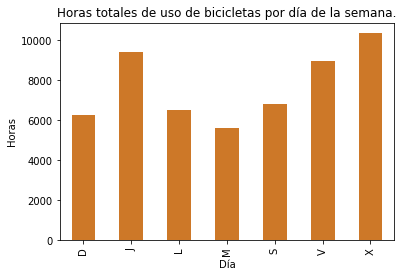

In [22]:
usos_weekday_time.plot.bar(color='#CD7828')
plt.title("Horas totales de uso de bicicletas por día de la semana.")
plt.xlabel("Día")
plt.ylabel("Horas")
plt.show()

#### C5

Crea una función llamada `total_usage_day` para calcular el número total de usos de bicicletas por día del mes. La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de usos.

Prueba la función anterior con el dataframe usos.

In [23]:
# El número de usos es sencillamente el número de filas.
# Ya que cada fila corresponde a un uso.

def total_usage_day(data: pd.DataFrame) -> pd.Series:
    return data.groupby('fecha').size()  

total_usage_day(usos)

fecha
2023-02-01    11442
2023-02-02    11069
2023-02-03    10166
2023-02-04     8903
2023-02-05     8026
2023-02-06    10118
2023-02-07     8986
2023-02-08    10576
2023-02-09    10814
2023-02-10    10579
2023-02-11     8383
2023-02-12     7801
2023-02-13     9802
2023-02-14    10341
2023-02-15    10766
2023-02-16     9684
2023-02-17    10067
2023-02-18      971
dtype: int64

In [24]:
# Una pequeña verificación
usos[usos.index=='2023-02-01'].shape

(11442, 15)

#### C6
Calcular el total de usos por fecha y estación de desbloqueo. Como la fecha está en el índice y la estación de desbloqueo es una columna, lo mejor es agrupar por la columna station_unlock y un objeto Grouper de frecuencia diaria (1D).

In [25]:
# De esta forma aplicamos el pd.Grouper para agrupar usando el índice y una columna
date_unlockstat_data = usos.groupby([pd.Grouper(freq="1D"), "station_unlock"]).size()
date_unlockstat_data

fecha       station_unlock
2023-02-01  1.0               31
            2.0               23
            3.0               39
            4.0               27
            5.0               26
                              ..
2023-02-18  263.0              1
            264.0              5
            267.0              1
            268.0              1
            270.0              4
Length: 4563, dtype: int64

#### C7
Se quiere averiguar la dirección de las estaciones de desbloqueo que a lo largo del mes han tenido un mayor número de viajes. Crear una función llamada `most_popular_stations` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un conjunto con la dirección de las estaciones.

In [26]:
def most_popular_stations(data: pd.DataFrame) -> set:
    station_uses = data.groupby("station_unlock").size().sort_values(ascending=False)
    station_uses = station_uses[station_uses == station_uses.max()]
    # Esto nos da el conjunto de indices en donde se alcanza el máximo
    return set(station_uses.index)
most_popular_stations(usos)

{43.0}

#### C8
Se quiere averiguar el número de usos de las estaciones de desbloqueo 
que a lo largo del mes ha tenido un mayor número de viajes. Crear 
una función llamada `usage_from_most_popular_station` que calcule dicho dato. 
El argumento de la función es un dataframe y devuelve un entero.

In [27]:
def usage_from_most_popular_station(data: pd.DataFrame) -> int:
    station_uses = data.groupby("station_unlock").size().sort_values(ascending=False)
    return station_uses.max()
usage_from_most_popular_station(usos)

2189

------------ Fin del Notebook -------------- \
Hemos escrito el notebook de la etapa 1. En otro archivo se encuentra el notebook con las mismas clases, pero que utiliza los métodos de la clase `bicimad`.